# Linear algebra demonstrations with fitness data

This notebook demonstrates key linear algebra concepts using a synthetic toy fitness dataset.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Display dataset info
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/fitness.csv'
df = pd.read_csv(url)
df.head()

,age,location,height,weight,fitness_level,workouts_per_week
0,58,0,59.5,124.6,7,3
1,24,4,60.7,118.4,6,0
2,32,4,71.0,180.4,10,6
3,55,2,75.2,189.6,8,2
4,39,2,62.1,157.2,9,5


## Introduction to linear algebra

Our fitness dataset is stored as a matrix - rows represent people, columns represent features.

In [2]:
# Convert dataframe to a matrix (numpy array)
data_matrix = df.values
print(f"Matrix shape: {data_matrix.shape}")
print(f"This means: {data_matrix.shape[0]} people (rows) × {data_matrix.shape[1]} features (columns)")
print(f"\nFirst 3 people as matrix rows:")
print(data_matrix[:3])

Matrix shape: (500, 6)
This means: 500 people (rows) × 6 features (columns)

First 3 people as matrix rows:
[[ 58.    0.   59.5 124.6   7.    3. ]
 [ 24.    4.   60.7 118.4   6.    0. ]
 [ 32.    4.   71.  180.4  10.    6. ]]


### Understanding N-dimensional feature space

Each person's data can be thought of as a **point in N-dimensional space**, where N is the number of features. Let's visualize this concept by progressively adding dimensions.

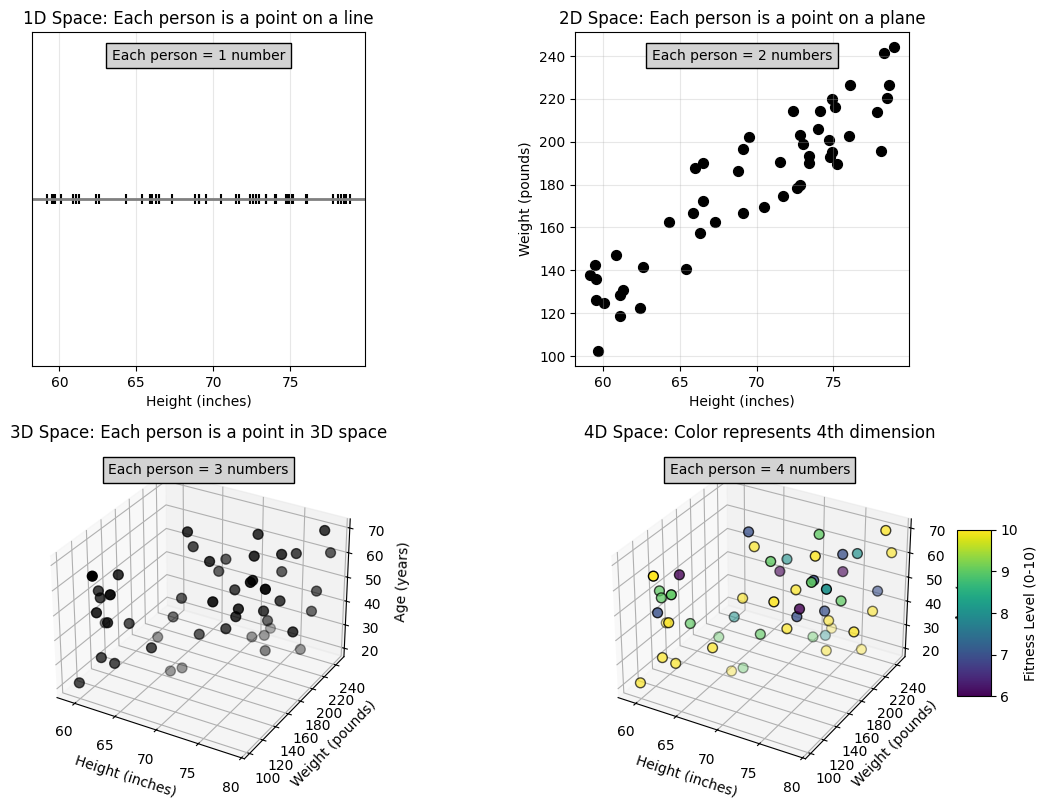

In [3]:
def feature_space_plot():
        
    # Select a subset of people to visualize
    sample_size = 50
    sample_indices = np.random.choice(len(data_matrix), sample_size, replace=False)
    sample_data = data_matrix[sample_indices]

    # Create a figure with 4 subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    # ============================================================
    # 1D: Single Feature (Height) on a Number Line
    # ============================================================
    heights = sample_data[:, 2]  # Height column
    y_positions = np.zeros_like(heights)  # All at y=0 for number line

    ax1 = axs[0]
    ax1.set_title('1D Space: Each person is a point on a line')
    ax1.scatter(heights, y_positions, marker='|', color='black', s=50)
    ax1.axhline(y=0, color='grey', linewidth=2)
    ax1.set_xlabel('Height (inches)')
    ax1.set_ylabel('')
    ax1.set_yticks([])

    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    ax1.set_aspect(abs(x1 - x0) / abs(y1 - y0))

    ax1.text(
        0.5,
        0.95,
        'Each person = 1 number', 
        transform=ax1.transAxes,
        ha='center',
        va='top', 
        bbox=dict(facecolor='lightgrey')
    )

    ax1.grid(axis='x', alpha=0.3)

    # ============================================================
    # 2D: Two Features (Height vs Weight) on Scatter Plot
    # ============================================================
    heights = sample_data[:, 2]
    weights = sample_data[:, 3]

    ax2 = axs[1]
    ax2.set_title('2D Space: Each person is a point on a plane')
    ax2.scatter(heights, weights, s=50, c='black')
    ax2.set_xlabel('Height (inches)')
    ax2.set_ylabel('Weight (pounds)')

    x0, x1 = ax2.get_xlim()
    y0, y1 = ax2.get_ylim()
    ax2.set_aspect(abs(x1 - x0) / abs(y1 - y0))

    ax2.text(
        0.5,
        0.95,
        'Each person = 2 numbers', 
        transform=ax2.transAxes,
        ha='center',
        va='top',
        bbox=dict(facecolor='lightgrey')
    )

    ax2.grid(alpha=0.3)

    # ============================================================
    # 3D: Three Features (Height, Weight, Age) on 3D Scatter
    # ============================================================
    heights = sample_data[:, 2]
    weights = sample_data[:, 3]
    ages = sample_data[:, 0]

    # Remove the 2D axis and replace with 3D
    axs[2].remove()
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')

    ax3.set_title('3D Space: Each person is a point in 3D space')
    scatter3d = ax3.scatter(heights, weights, ages, s=50, c='black')
    ax3.set_xlabel('Height (inches)')
    ax3.set_ylabel('Weight (pounds)')
    ax3.set_zlabel('Age (years)')

    ax3.text2D(
        0.5,
        0.95,
        'Each person = 3 numbers', 
        transform=ax3.transAxes,
        ha='center',
        va='top',
        bbox=dict(facecolor='lightgrey')
    )

    # ============================================================
    # 4D: Four Features (Height, Weight, Age + Fitness as Color)
    # ============================================================
    heights = sample_data[:, 2]
    weights = sample_data[:, 3]
    ages = sample_data[:, 0]
    fitness = sample_data[:, 4]  # 4th dimension shown as color

    # Remove the 2D axis and replace with 3D
    axs[3].remove()
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    ax4.set_title('4D Space: Color represents 4th dimension')
    scatter4d = ax4.scatter(heights, weights, ages, s=50, c=fitness, cmap='viridis', edgecolor='black')
    ax4.set_xlabel('Height (inches)')
    ax4.set_ylabel('Weight (pounds)')
    ax4.set_zlabel('Age (years)')

    ax4.text2D(
        0.5,
        0.95,
        'Each person = 4 numbers', 
        transform=ax4.transAxes,
        ha='center',
        va='top',
        bbox=dict(facecolor='lightgrey')
    )

    cbar = plt.colorbar(scatter4d, ax=ax4, shrink=0.5, aspect=5)
    cbar.set_label('Fitness Level (0-10)')

    plt.tight_layout()
    plt.show()

feature_space_plot()

### Why this matters for machine learning

Understanding data as points in N-dimensional space helps us:

1. **Measure Distance**: Similar people are close together in this space
2. **Find Patterns**: Clusters of points reveal groups with similar characteristics
3. **Make Predictions**: A new person's location in this space helps predict unknown features
4. **Reduce Dimensions**: Techniques like PCA find the most important directions in high-dimensional space

Linear algebra provides the mathematical tools to work with this high-dimensional space, even though we can't visualize it directly!

### Machine learning models are also matrices!

Just like data can be represented as matrices, **machine learning models themselves are matrices** of parameters (weights and biases). Let's see how model complexity grows with dimensions.

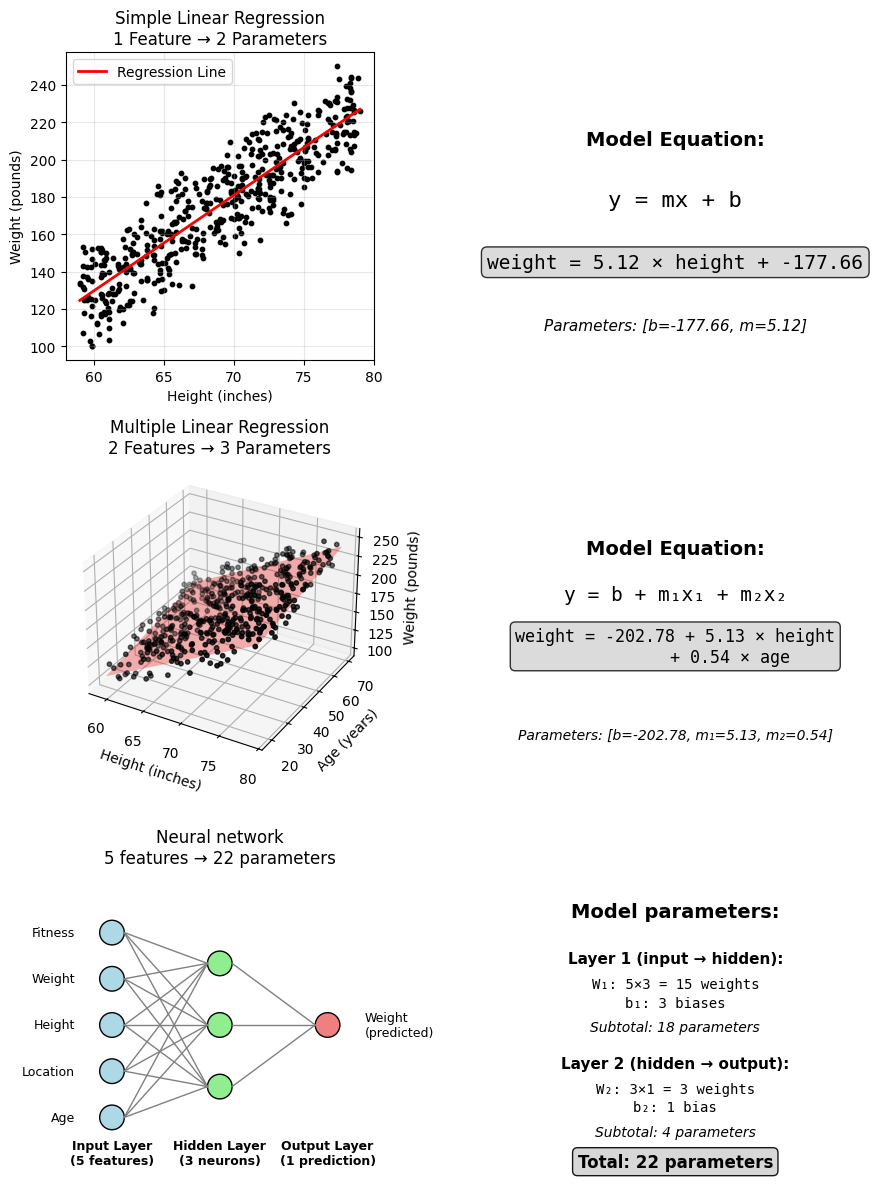

In [4]:
def models_plot():

    # Create a figure with 3 rows and 2 columns
    fig = plt.figure(figsize=(10, 12))

    # ============================================================
    # ROW 1: Simple Linear Regression (1 Feature)
    # ============================================================

    # Subplot 1: Regression plot
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)

    # Extract features
    X_1d = df['height'].values.reshape(-1, 1)
    y = df['weight'].values

    # Fit simple linear regression: y = mx + b
    # Using Normal Equation: θ = (X'X)^(-1)X'y
    # Add bias term (column of ones) to X
    X_1d_bias = np.column_stack([np.ones(len(X_1d)), X_1d])
    theta_1d = np.linalg.inv(X_1d_bias.T @ X_1d_bias) @ X_1d_bias.T @ y

    # Extract parameters
    b = theta_1d[0]  # intercept
    m = theta_1d[1]  # slope

    # Plot data and regression line
    ax1.scatter(df['height'], df['weight'], c='black', s=10)
    height_range = np.array([df['height'].min(), df['height'].max()])
    weight_pred = m * height_range + b
    ax1.plot(height_range, weight_pred, 'r-', linewidth=2, label='Regression Line')
    ax1.set_xlabel('Height (inches)')
    ax1.set_ylabel('Weight (pounds)')
    ax1.set_title('Simple Linear Regression\n1 Feature → 2 Parameters')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    ax1.set_aspect(abs(x1 - x0) / abs(y1 - y0))

    # Subplot 2: Show equation
    ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
    ax2.text(0.5, 0.7, 'Model Equation:', ha='center', fontsize=14, fontweight='bold',
            transform=ax2.transAxes)
    ax2.text(0.5, 0.5, f'y = mx + b', ha='center', fontsize=16,
            transform=ax2.transAxes, family='monospace')
    ax2.text(0.5, 0.3, f'weight = {m:.2f} × height + {b:.2f}', ha='center', fontsize=14,
            transform=ax2.transAxes, family='monospace', 
            bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.8))
    ax2.text(0.5, 0.1, f'Parameters: [b={b:.2f}, m={m:.2f}]', ha='center', fontsize=11,
            transform=ax2.transAxes, style='italic')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis('off')

    # ============================================================
    # ROW 2: Multiple Linear Regression (2 Features)
    # ============================================================

    # Subplot 3: 3D Regression plot
    ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, projection='3d')

    # Extract features
    X_2d = df[['height', 'age']].values
    y = df['weight'].values

    # Fit multiple linear regression: y = b + m₁x₁ + m₂x₂
    # Using Normal Equation
    X_2d_bias = np.column_stack([np.ones(len(X_2d)), X_2d])
    theta_2d = np.linalg.inv(X_2d_bias.T @ X_2d_bias) @ X_2d_bias.T @ y

    # Extract parameters
    b_2d = theta_2d[0]      # intercept
    m1 = theta_2d[1]        # height coefficient
    m2 = theta_2d[2]        # age coefficient

    # Plot data points
    ax3.scatter(df['height'], df['age'], df['weight'], c='black', s=10)

    # Create regression plane
    height_grid = np.linspace(df['height'].min(), df['height'].max(), 10)
    age_grid = np.linspace(df['age'].min(), df['age'].max(), 10)
    height_mesh, age_mesh = np.meshgrid(height_grid, age_grid)
    weight_mesh = b_2d + m1 * height_mesh + m2 * age_mesh

    ax3.plot_surface(height_mesh, age_mesh, weight_mesh, alpha=0.3, color='red')
    ax3.set_xlabel('Height (inches)')
    ax3.set_ylabel('Age (years)')
    ax3.set_zlabel('Weight (pounds)')
    ax3.set_title('Multiple Linear Regression\n2 Features → 3 Parameters')

    # Subplot 4: Show equation
    ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
    ax4.text(0.5, 0.7, 'Model Equation:', ha='center', fontsize=14, fontweight='bold',
            transform=ax4.transAxes)
    ax4.text(0.5, 0.55, f'y = b + m₁x₁ + m₂x₂', ha='center', fontsize=14,
            transform=ax4.transAxes, family='monospace')
    ax4.text(0.5, 0.35, f'weight = {b_2d:.2f} + {m1:.2f} × height\n           + {m2:.2f} × age', 
            ha='center', fontsize=12, transform=ax4.transAxes, family='monospace',
            bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.8))
    ax4.text(0.5, 0.1, f'Parameters: [b={b_2d:.2f}, m₁={m1:.2f}, m₂={m2:.2f}]', 
            ha='center', fontsize=10, transform=ax4.transAxes, style='italic')
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')

    # ============================================================
    # ROW 3: Neural Network (All 5 Features)
    # ============================================================

    # Calculate parameters first (needed for both subplots)
    w1_params = 5 * 3  # weights
    b1_params = 3      # biases
    w2_params = 3 * 1  # weights
    b2_params = 1      # biases
    total_params = w1_params + b1_params + w2_params + b2_params

    # Subplot 5: Neural network schematic (wider - takes 2 columns)
    ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    # Network architecture: 5 inputs → 3 hidden → 1 output
    n_inputs = 5
    n_hidden = 3
    n_output = 1

    # Define layer positions
    input_y = np.linspace(0.2, 0.8, n_inputs)
    hidden_y = np.linspace(0.3, 0.7, n_hidden)
    output_y = [0.5]

    input_x = 0.15
    hidden_x = 0.5
    output_x = 0.85

    # Draw input layer
    feature_names = ['Age', 'Location', 'Height', 'Weight', 'Fitness']
    for i, (y, name) in enumerate(zip(input_y, feature_names)):
        circle = plt.Circle((input_x, y), 0.04, color='lightblue', ec='black', linewidth=1)
        ax5.add_patch(circle)
        ax5.text(input_x - 0.12, y, name, ha='right', va='center', fontsize=9)

    # Draw hidden layer
    for i, y in enumerate(hidden_y):
        circle = plt.Circle((hidden_x, y), 0.04, color='lightgreen', ec='black', linewidth=1)
        ax5.add_patch(circle)

    # Draw output layer
    circle = plt.Circle((output_x, output_y[0]), 0.04, color='lightcoral', ec='black', linewidth=1)
    ax5.add_patch(circle)
    ax5.text(output_x + 0.12, output_y[0], 'Weight\n(predicted)', ha='left', va='center', fontsize=9)

    # Draw connections (weights) - input to hidden
    for i, y_in in enumerate(input_y):
        for j, y_hid in enumerate(hidden_y):
            ax5.plot([input_x + 0.04, hidden_x - 0.04], [y_in, y_hid], 
                    'gray', linewidth=1)

    # Draw connections - hidden to output
    for y_hid in hidden_y:
        ax5.plot([hidden_x + 0.04, output_x - 0.04], [y_hid, output_y[0]], 
                'gray', linewidth=1)

    # Add labels for layers
    ax5.text(input_x, 0.05, 'Input Layer\n(5 features)', ha='center', fontsize=9, fontweight='bold')
    ax5.text(hidden_x, 0.05, 'Hidden Layer\n(3 neurons)', ha='center', fontsize=9, fontweight='bold')
    ax5.text(output_x, 0.05, 'Output Layer\n(1 prediction)', ha='center', fontsize=9, fontweight='bold')

    ax5.set_xlim(0, 1)
    ax5.set_ylim(0, 1)
    ax5.set_aspect('equal')
    ax5.axis('off')
    ax5.set_title('Neural network\n5 features → 22 parameters', fontsize=12)

    # Subplot 6: Parameter information (narrower - takes 1 column)
    ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

    # Display parameter breakdown
    ax6.text(0.5, 0.85, 'Model parameters:', ha='center', fontsize=14, fontweight='bold',
            transform=ax6.transAxes)

    # Layer 1 parameters
    ax6.text(0.5, 0.70, 'Layer 1 (input → hidden):', ha='center', fontsize=11, fontweight='bold',
            transform=ax6.transAxes)
    ax6.text(0.5, 0.62, f'W₁: 5×3 = {w1_params} weights', ha='center', fontsize=10,
            transform=ax6.transAxes, family='monospace')
    ax6.text(0.5, 0.56, f'b₁: {b1_params} biases', ha='center', fontsize=10,
            transform=ax6.transAxes, family='monospace')
    ax6.text(0.5, 0.48, f'Subtotal: {w1_params + b1_params} parameters', ha='center', fontsize=10,
            transform=ax6.transAxes, style='italic')

    # Layer 2 parameters
    ax6.text(0.5, 0.36, 'Layer 2 (hidden → output):', ha='center', fontsize=11, fontweight='bold',
            transform=ax6.transAxes)
    ax6.text(0.5, 0.28, f'W₂: 3×1 = {w2_params} weights', ha='center', fontsize=10,
            transform=ax6.transAxes, family='monospace')
    ax6.text(0.5, 0.22, f'b₂: {b2_params} bias', ha='center', fontsize=10,
            transform=ax6.transAxes, family='monospace')
    ax6.text(0.5, 0.14, f'Subtotal: {w2_params + b2_params} parameters', ha='center', fontsize=10,
            transform=ax6.transAxes, style='italic')

    # Total
    ax6.text(0.5, 0.04, f'Total: {total_params} parameters', ha='center', fontsize=12,
            transform=ax6.transAxes, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.9))

    ax6.set_xlim(0, 1)
    ax6.set_ylim(0, 1)
    ax6.axis('off')

    plt.tight_layout()
    plt.show()

models_plot()